## Lab 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
egg_production=pd.read_csv("Egg_Production_2007_2012.csv")
egg_production.head()

,States/Uts,2007-08 (In lakh nos.),2008-09 (In lakh nos.),2009-10 (In lakh nos.),2010-11 (In lakh nos.),2011-12 (In lakh nos.)
0,Andhra Pradesh,175884,183446,193958,201277,212103
1,Arunachal Pradesh,394,361,380,407,419
2,Assam,4910,4659,4671,4707,4705
3,Bihar,10707,10740,11002,7446,7552
4,Chhattisgarh,9184,9738,10520,12454,12984


In [4]:
milk_production=pd.read_csv("Milk_Production_2007_2012.csv")
milk_production.head()

,States/Uts,2007-08,2008-09,2009-10,2010-11,2011-12
0,Andhra Pradesh,8925,9570,10429,11203,12088
1,Arunachal Pradesh,32,24,26,28,22
2,Assam,752,753,756,790,796
3,Bihar,5783,5934,6124,6517,6643
4,Chhattisgarh,866,908,956,1029,1119


In [5]:
egg_production.rename(columns = {'2007-08 (In lakh nos.)':'2007-08','2008-09 (In lakh nos.)':'2008-09','2009-10 (In lakh nos.)':'2009-10','2010-11 (In lakh nos.)':'2010-11','2011-12 (In lakh nos.)':'2011-12'}, inplace = True)

In [6]:
egg_production.columns

Index(['States/Uts', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12'], dtype='object')

1. Merge two data into a data frame such that the new data frame has multi-level columns (like
years under milk/eggs). Try to change the column names if required.

In [8]:
df =pd.merge(egg_production,milk_production,on="States/Uts",how="inner",suffixes=('_egg', '_milk'))

In [10]:
columns = [("","States/Uts"),("Eggs","2007-08"),  ("Eggs","2008-09"),  ("Eggs","2009-10"),  ("Eggs","2010-11"),  ("Eggs","2011-12"),  ("Milk","2007-08"), ("Milk","2008-09"), ("Milk","2009-10"), ("Milk","2010-11"), ("Milk","2011-12")]

df.columns = pd.MultiIndex.from_tuples(columns)
df.head()

Eggs                                    Milk          \
          States/Uts 2007-08 2008-09 2009-10 2010-11 2011-12 2007-08 2008-09   
0     Andhra Pradesh  175884  183446  193958  201277  212103    8925    9570   
1  Arunachal Pradesh     394     361     380     407     419      32      24   
2              Assam    4910    4659    4671    4707    4705     752     753   
3              Bihar   10707   10740   11002    7446    7552    5783    5934   
4       Chhattisgarh    9184    9738   10520   12454   12984     866     908   

                           
  2009-10 2010-11 2011-12  
0   10429   11203   12088  
1      26      28      22  
2     756     790     796  
3    6124    6517    6643  
4     956    1029    1119

In [11]:
df_milk=milk_production[milk_production['States/Uts'].isin(['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh','Punjab'])]
label=['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh','Punjab']

2. Present the production of milk in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and Panjab
on 2007-2008 as a Pie chart. The pie chart should consist of proportion in percentage and labels
for each piece.

Milk Production


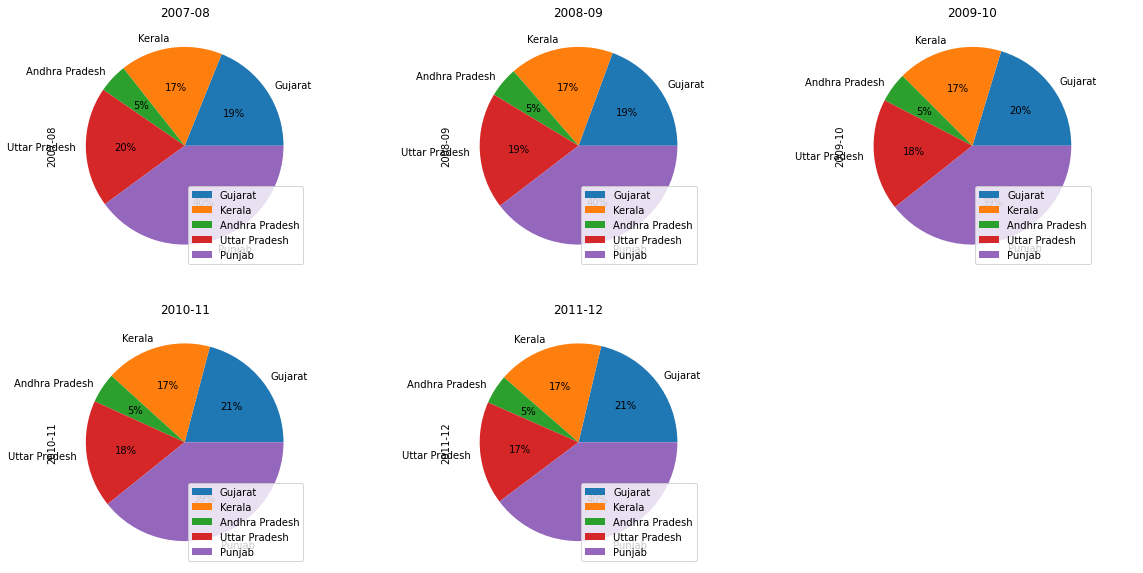

In [12]:
print("Milk Production")
fig,axes=plt.subplots(2,3,figsize=(20,10))
df_milk.plot.pie(x='States/Uts',y='2007-08',labels=label, autopct='%.0f%%',ax=axes[0,0],title="2007-08")
df_milk.plot.pie(x='States/Uts',y='2008-09',labels=label, autopct='%.0f%%', ax=axes[0,1],title='2008-09')
df_milk.plot.pie(x='States/Uts',y='2009-10',labels=label, autopct='%.0f%%', ax=axes[0,2],title='2009-10')
df_milk.plot.pie(x='States/Uts',y='2010-11',labels=label, autopct='%.0f%%',ax=axes[1,0],title="2010-11")
df_milk.plot.pie(x='States/Uts',y='2011-12',labels=label, autopct='%.0f%%', ax=axes[1,1],title='2011-12')
axes[1,2].axis('off')

plt.show()

3. Plot five pie charts of egg production in Gujarat, Kerala, Andhra Pradesh, Uttar Pradesh and
Panjab given five years range. Each pie chart should represent the egg production in above five
states for a given year.

Egg Production


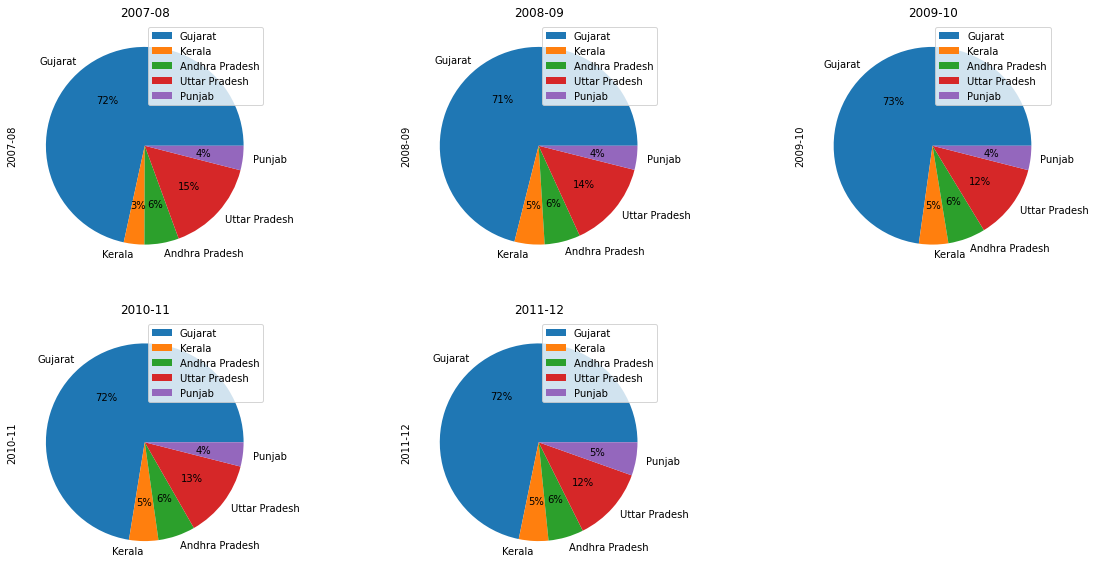

In [13]:
df_egg=egg_production[egg_production['States/Uts'].isin(['Gujarat', 'Kerala', 'Andhra Pradesh', 'Uttar Pradesh','Punjab'])]

print("Egg Production")
fig,axes=plt.subplots(2,3,figsize=(20,10))
df_egg.plot.pie(x='States/Uts',y='2007-08',labels=label, autopct='%.0f%%',ax=axes[0,0],title="2007-08")
df_egg.plot.pie(x='States/Uts',y='2008-09',labels=label, autopct='%.0f%%', ax=axes[0,1],title='2008-09')
df_egg.plot.pie(x='States/Uts',y='2009-10',labels=label, autopct='%.0f%%', ax=axes[0,2],title='2009-10')
df_egg.plot.pie(x='States/Uts',y='2010-11',labels=label, autopct='%.0f%%',ax=axes[1,0],title="2010-11")
df_egg.plot.pie(x='States/Uts',y='2011-12',labels=label, autopct='%.0f%%', ax=axes[1,1],title='2011-12')
axes[1,2].axis('off')
plt.show()

In [14]:
egg_production_normalized=egg_production.iloc[:-1]
egg_production_normalized_columns=['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
for column in egg_production_normalized_columns:
    egg_production_normalized[column] = (egg_production_normalized[column] - egg_production_normalized[column].min()) / (egg_production_normalized[column].max() - egg_production_normalized[column].min())    
  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6320\112861160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_production_normalized[column] = (egg_production_normalized[column] - egg_production_normalized[column].min()) / (egg_production_normalized[column].max() - egg_production_normalized[column].min())


4. Plot Staked Area Chart that represents state wise (i.e. states are in x axis) production of eggs
(y-axis). There would be five stacked colors and each color represents the production of egg in
a state. The egg production for each state should be normalized over the year range.

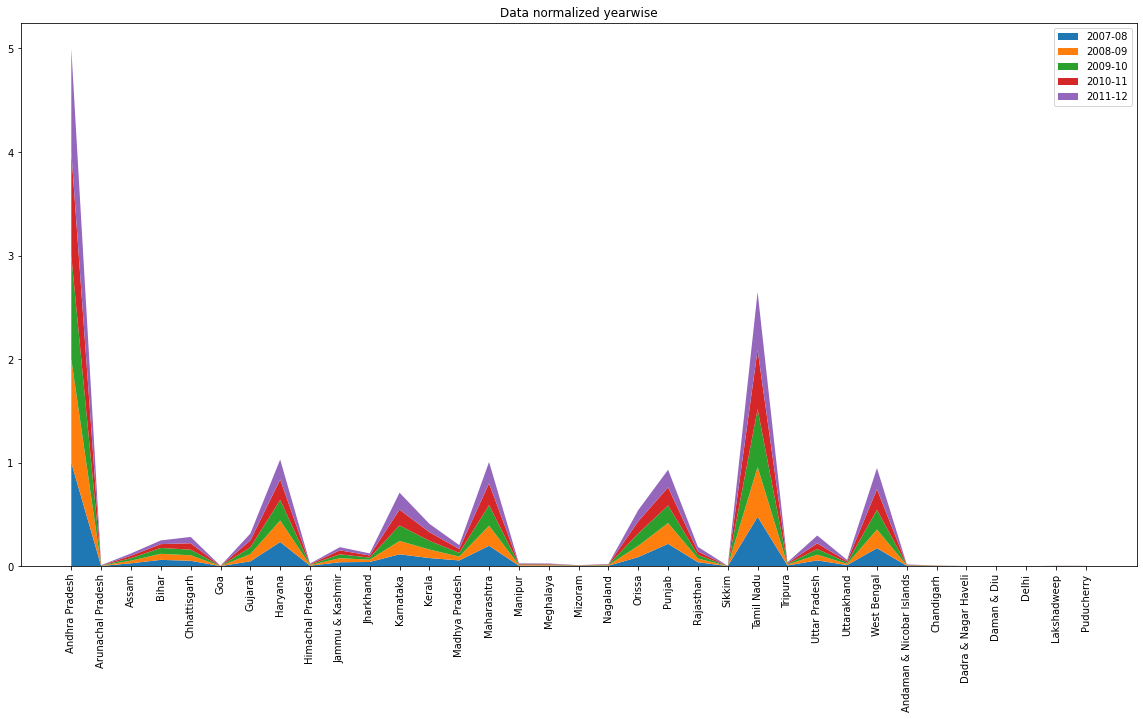

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
labels=['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
ax.stackplot(egg_production_normalized['States/Uts'],egg_production_normalized.drop(['States/Uts'],axis=1).T,labels=labels)
plt.xticks(rotation=90)
ax.legend(loc='upper right')
plt.title("Data normalized yearwise")
plt.show()

In [16]:
egg_production_normalized_statewise=egg_production[:-1]
egg_production_normalized_statewise.iloc[:,1:]=egg_production_normalized_statewise.iloc[:,1:].div(egg_production_normalized_statewise.iloc[:,1:].sum(axis=1), axis=0)

d:\New folder\SEm6\sem6\lib\site-packages\pandas\core\indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


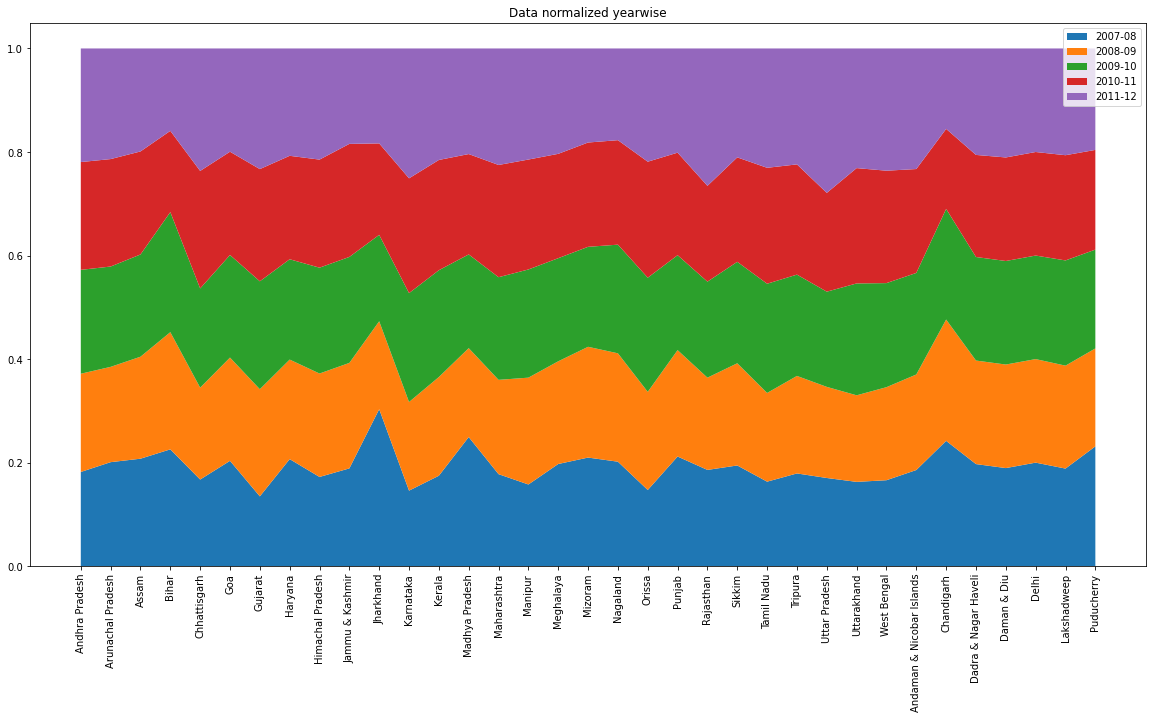

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
labels=['2007-08', '2008-09', '2009-10', '2010-11', '2011-12']
ax.stackplot(egg_production_normalized_statewise['States/Uts'],egg_production_normalized_statewise.drop(['States/Uts'],axis=1).T,labels=labels)
plt.xticks(rotation=90)
ax.legend(loc='upper right')
plt.title("Data normalized yearwise")
plt.show()